In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import scikitplot as skplt
from typing import List
from itertools import combinations
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
df = pd.read_csv("Mondrian_k_10_anon_insurance.csv", sep=";")
df.charges.value_counts()

<10000     712
>=10000    626
Name: charges, dtype: int64

In [12]:
label_encoder = preprocessing.LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])
df["smoker"] = label_encoder.fit_transform(df["smoker"])
df["region"] = label_encoder.fit_transform(df["region"])
df["age"] = label_encoder.fit_transform(df["age"])
df["bmi"] = label_encoder.fit_transform(df["bmi"])
df["children"] = label_encoder.fit_transform(df["children"])

In [13]:
feature_columns = ["age","sex","bmi","children","smoker","region"]

In [14]:
x = df[feature_columns].values
y = df.charges.values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(100)
#model = XGBClassifier()
#model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [15]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[216  13]
 [ 28 145]]


In [17]:
cr = metrics.classification_report(y_test, y_pred)
print("Classification Report: ")
print(cr)

Classification Report: 
              precision    recall  f1-score   support

      <10000       0.89      0.94      0.91       229
     >=10000       0.92      0.84      0.88       173

    accuracy                           0.90       402
   macro avg       0.90      0.89      0.89       402
weighted avg       0.90      0.90      0.90       402



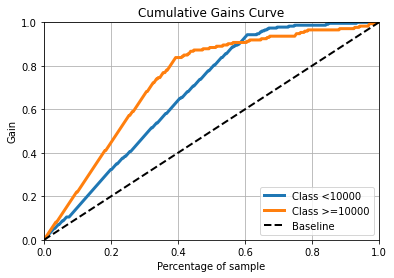

In [18]:
predicted_probas = model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()